In [4]:
"""Adapted from: https://www.programmersought.com/article/8437785923/"""
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [5]:
# 
mean_filter = np.ones((3, 3))
# 
x = cv2.getGaussianKernel(5, 10)
# x.T Transpose for matrix
gaussian = x*x.T
# different edge detecting filters
# scharrx operator
scharr = np.array([[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]])
# sobelx operator
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
# sobely operator
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
 # 
laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

In [8]:
filters = [mean_filter, gaussian, laplacian, sobel_x, sobel_y, scharr]
filter_name = ['mean_filter', 'gaussian', 'laplacian', 'sobel_x', 'sobel_y', 'scharr_x']

In [10]:
#for each filter, do DFT (using FFT algorithm)
fft_filters = [np.fft.fft2(x) for x in filters]

In [ ]:
#for each fft_filters, do shift
fft_shift = [np.fft.fftshift(y) for y in fft_filters]

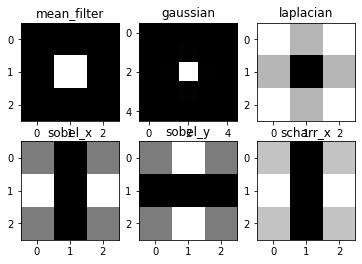

In [7]:
mag_spectrum = [np.log(np.abs(z)+1) for z in fft_shift]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(mag_spectrum[i], cmap='gray'),
    plt.title(filter_name[i])
plt.show()